Data Analysis: Clinic 1 - Group 15

Names: Emma Calvino, Ingrid Salvador, Miriam Espinosa

Numbers: i6328339, i6314966

**Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow)**: *list websites where you found code (or other info) as well as include information on how you used genAI tools*

# Data Analysis, Clinic 1
# FIETS: Fundamentele Innovatie En Technologie in Scholing
## Met FIETS blijft het onderwijs vooruitgaan, zelfs tegen de wind in!

---

By completing and delivering the clinic tasks you will know how to :

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up **noisy** real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Use EDA to learn more about your data
- Create and interpret informative visualizations to explore the data set
- Derive meaningful insights for the societal impact of datasets

---
**Important Dates.**

- Clinic 1 release: Thu 30 Jan 2024
- Clinic 1 due: Fri 07 Feb 2024 late night, wildcards available

**Instructions for the deliverable:**

* You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.

* Make sure that you include a proper amount/mix of comments, results and code. More specifically, be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.

* For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).

* Back up any hypotheses and claims with data, since this is an important aspect of the course.

* Please write all your comments in English, and use meaningful variable names (as possible) in your code. 

* In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. We will not run your notebook for you! 

- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

* You are asked to deliver **only your executed notebook file, .ipnyb** and nothing else. If you deliver other files, we will not grade anything.

* Honor code applies to these tasks. If you are not certain about an action, consult with Jerry.

**A Note from Jerry on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating (that does not only apply to LMs). Fortunately, my job is not to police, but rather to educate you. So, please consider the following:

I assume that you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!

I don't restrict the use of LMs because I see the value of being helped when coding (esp. in the context of pandas dataframes nightmare :)). Based on what we saw last year in your notebooks, it's pretty clear when you "copy" some code and then you struggle to interpret the results. This is the essence of this course and of the skills you should try build for yourself: Many people can run fancy models these days but not many people can interpret the results correctly. Try to be the latter ones.

---

## Context

AI is booming! Newspapers, influencers and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future esp. in critical sectors like education looks like...

Freshly graduated from a top Dutch university in Limburg, you are hired by the Dutch government to advise on a large-scale “education innovation” initiative code-named "FIETS" (Flexibele Innovatie voor Efficiënte Toepassing in Scholing). With higher education facing severe budget cuts, the government is looking for creative solutions to "do more with less." Convinced by the stunning progress in language modeling, officials believe LLMs could help battle growing teacher shortages and reduce costs by automating parts of the education process. Your job description: investigate which LMs might be best suited to plug the gaps without draining the budget!

You are handed the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset  to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, the intern responsible for collecting the results, didn’t pay attention during DACS KEN3450: Data Analysis. As a result, the collected datasets are slightly corrupted. Jammer!

The success of FIETS depends on your ability to make sense of the messy data and recommend the best model to keep the Dutch education system pedaling forward—despite uphill challenges like funding shortages and a skeptical academic community!

### A very brief primer on Language Models
We studied LLMs in the context of the NLP course but here is a short reminder. Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project the objectives of FIETS:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 FIETS
│
├── 📄 clinic1.ipynb (the file you're currently reading!)
│
└── 📁 data
    ├── 📁 task_1
    ├── 📁 task_2
    └── 📁 task_2.5
```   
 

In [1]:
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [2]:
df_test = pd.read_csv('data/task_1/mmlu_data/test.csv')

f = 'data/task_1/lm_scores/'
df_x = pd.read_csv(os.path.join(f, 'lm_X.csv'))
df_y = pd.read_csv(os.path.join(f, 'lm_Y.csv'))
df_z = pd.read_csv(os.path.join(f, 'lm_Z.csv'))

print('df_test: ', df_test.shape)
print('df_x: ', df_x.shape)
print('df_y: ', df_y.shape)
print('df_z: ', df_z.shape)

df_test:  (14042, 8)
df_x:  (13882, 2)
df_y:  (13978, 2)
df_z:  (13923, 2)


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [4]:
# A
#For the dataframe test
print('df_test: ', df_test.value_counts())
#For the dataframe lm_X
print('df_x: ', df_x.value_counts())
#For the datafram lm_Y
print('df_y: ', df_y.value_counts())
#For the dataframe lm_Z
print('df_z: ', df_z.value_counts())

df_test:  question                                                                                                                                                                                                                                                                                                                                                      A                                                   B                                                  C                                                        D                                                                 answer  subject                 question_id
 A 10% increase (decrease) in price produces a 10% decrease (increase) in quantity demanded. This is referred to as:                                                                                                                                                                                                                                          Zero price elasticit

In [2]:
# B

The expected format for answers across all dataframes (df_x, df_y, and df_z) is a single letter: 'A', 'B', 'C', or 'D'. However, several responses differ from this format, leading to inconsistencies in the data:

- Answers prefixed with "Answer: " instead of just the letter.
- Full sentence responses that contain explanations instead of a single letter.

**Four Specific Examples of Unexpected Answers:**
- Question ID: 4658 (df_y) : The response is "Answer: C" instead of just "C".
- Question ID: 4664 (df_z) : The response is "Answer: A" instead of just "A".
- Question ID: 4661 (df_y) : The response is "The demand for labor is derived from the demand for the products produced by labor., so the answer is D" instead of just "D".
- Question ID: 9403 (df_x) : The response is "Answer: D" instead of just "D".


These inconsistencies may cause issues when processing or analyzing the data, so standardizing the answer format is necessary.

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [5]:
#A
#We will filter df_x,df_y and df_z to include less than 10 characters and use Pandas .copy(deep=True) to ensure a deep copy is created
df_x_filter = df_x[df_x['result'].str.len() < 10].copy(deep=True)
df_y_filter = df_y[df_y['result'].str.len() < 10].copy(deep=True)
df_z_filter= df_z[df_z['result'].str.len() < 10].copy(deep=True)

#and now print the results
print(df_x_filter)
print(df_y_filter)
print(df_z_filter)

       question_id     result
0                0          B
1                1          C
2                2         D 
3                3         B 
4                4  Answer: B
...            ...        ...
13877        14037         A 
13878        14038          A
13879        14039          B
13880        14040          B
13881        14041  Answer: A

[13509 rows x 2 columns]
       question_id     result
0                0  Answer: D
1                1          D
2                2  Answer: D
4                4          D
5                5          C
...            ...        ...
13973        14037         C 
13974        14038          D
13975        14039  Answer: D
13976        14040          B
13977        14041         D 

[13637 rows x 2 columns]
       question_id     result
0                0          B
1                1  Answer: B
2                2          C
3                3         B 
4                4          B
...            ...        ...
13918        14037

In [6]:
#B
#Use the apply() Pandas functionality to make sure all the answers are as 'A','B','C, or 'D'
def clean_answer(s, pattern='-'):
    return str(s).replace("Answer: ", "")

# Apply to each dataframe
df_x_filter["result"] = df_x_filter["result"].apply(clean_answer)
df_y_filter["result"] = df_y_filter["result"].apply(clean_answer)
df_z_filter["result"] = df_z_filter["result"].apply(clean_answer)

#and now print the results
print(df_x_filter)
print(df_y_filter)
print(df_z_filter)

#And print the sizes for part C discussion
print('df_x: ', df_x_filter.shape)
print('df_y: ', df_y_filter.shape)
print('df_z: ', df_z_filter.shape)

       question_id result
0                0      B
1                1      C
2                2     D 
3                3     B 
4                4      B
...            ...    ...
13877        14037     A 
13878        14038      A
13879        14039      B
13880        14040      B
13881        14041      A

[13509 rows x 2 columns]
       question_id result
0                0      D
1                1      D
2                2      D
4                4      D
5                5      C
...            ...    ...
13973        14037     C 
13974        14038      D
13975        14039      D
13976        14040      B
13977        14041     D 

[13637 rows x 2 columns]
       question_id result
0                0      B
1                1      B
2                2      C
3                3     B 
4                4      B
...            ...    ...
13918        14037      A
13919        14038      A
13920        14039      B
13921        14040     B 
13922        14041      A

[12878 rows

C. /Discuss:/

Before filtering the sizes were: df_x: (13882, 2) df_y: (13978, 2) df_z: (13923, 2)

now they are; df_x: (13509, 2) df_y: (13637, 2) df_z: (12878, 2)

We can observe some rows have been removed from the dataframe, these are the ones with answers with more than 10 characters.

Even though this is a small percentage of the total data, it still represents a loss of information. If the removed answers contained valuable information (e.g., explanations or formatted differently), we might lose insights. If the removed rows had systematic patterns (e.g., specific question types affected), it could bias our results.

Instead of dropping long answers, we could normalize them (e.g., extract the letter from "Answer: A" instead of removing it).

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [7]:
# A
#We use pandas to merge each dataframe with df_test through the column of question_id so we can use the LM

#To only use matching rows we specify 'inner'

df_x_merged = pd.merge(df_x_filter, df_test, on="question_id", how="inner")
df_y_merged = pd.merge(df_y_filter, df_test, on="question_id", how="inner")
df_z_merged = pd.merge(df_z_filter, df_test, on="question_id", how="inner")

# and now we print these merged dataframes
print(df_x_merged)
print(df_y_merged)
print(df_z_merged)

       question_id result                                           question  \
0                0      B  Find the degree for the given field extension ...   
1                1      C  Let p = (1, 2, 5, 4)(2, 3) in S_5 . Find the i...   
2                2     D   Find all zeros in the indicated finite field o...   
3                3     B   Statement 1 | A factor group of a non-Abelian ...   
4                4      B  Find the product of the given polynomials in t...   
...            ...    ...                                                ...   
13504        14037     A   What has been a central focus of religious tra...   
13505        14038      A   To whom did ordinary folk appeal during a dro...   
13506        14039      B   The theological term homoousios means which o...   
13507        14040      B  According to the Japanese origin myth, who giv...   
13508        14041      A   The numen of Augustus referred to which of th...   

                            A          

In [8]:
# B
# Add 'correct' column to check if the result matches the answer using astype Pandas to turn true into 1 and false into 0
df_x_merged['correct'] = (df_x_merged['result'] == df_x_merged['answer']).astype(int)
df_y_merged['correct'] = (df_y_merged['result'] == df_y_merged['answer']).astype(int)
df_z_merged['correct'] = (df_z_merged['result'] == df_z_merged['answer']).astype(int)

# Calculate the average score for each model
avg_score_x = df_x_merged['correct'].mean()
avg_score_y = df_y_merged['correct'].mean()
avg_score_z = df_z_merged['correct'].mean()

# Print the average scores
print(f" Model X: {avg_score_x:.4f}")
print(f" Model Y: {avg_score_y:.4f}")
print(f" model Z: {avg_score_z:.4f}")

 Model X: 0.5567
 Model Y: 0.5893
 model Z: 0.5947


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X, i.e., (200 - 181) / 181 > 0.10

In [9]:
#A
# Group by subject
model_x_bysubject = df_x_merged.groupby('subject')['question_id']
model_y_bysubject = df_y_merged.groupby('subject')['question_id']
model_z_bysubject = df_z_merged.groupby('subject')['question_id']

#count how many questions are answered by these models
x_counts = model_x_bysubject.count()
y_counts = model_y_bysubject.count()
z_counts = model_z_bysubject.count()

# Calculate the percentage differences between each pair of models
X_Y_diff = abs(x_counts - y_counts) / y_counts * 100
X_Z_diff = abs(x_counts - z_counts) / z_counts* 100
Y_Z_diff = abs(y_counts - z_counts) / z_counts * 100

# Filter subjects with more than 10% difference in any of the comparisons
subjects_with_diff = X_Y_diff[(X_Y_diff > 10) | (X_Z_diff > 10) | (Y_Z_diff > 10)]

# Print the subjects with more than 10% difference
print(subjects_with_diff)

subject
college chemistry            1.020408
college computer science     1.020408
computer security            2.040816
formal logic                12.096774
high school geography        0.512821
logical fallacies           12.408759
medical genetics             1.010101
moral disputes               9.539474
moral scenarios             14.532872
Name: question_id, dtype: float64


In [10]:
#B
#To rebalance the dataframe we can reduce amount of overrepresented samples by oversampling
import pandas as pd

# Step 1: Count questions per subject
x_counts = df_x_merged['subject'].value_counts()
y_counts = df_y_merged['subject'].value_counts()
z_counts = df_z_merged['subject'].value_counts()

# Step 2: Find the minimum number of questions per subject
min_samples_per_subject = min(x_counts.min(), y_counts.min(), z_counts.min())

# Step 3: Apply undersampling
def undersample(df, min_samples):
    return df.groupby('subject').apply(lambda x: x.sample(n=min_samples, random_state=42)).reset_index(drop=True)

df_x_balanced = undersample(df_x_merged, min_samples_per_subject)
df_y_balanced = undersample(df_y_merged, min_samples_per_subject)
df_z_balanced = undersample(df_z_merged, min_samples_per_subject)

# Step 4: Verify that subjects are now balanced
print(df_x_balanced['subject'].value_counts())  # Should be the same for all three datasets
print(df_y_balanced['subject'].value_counts())
print(df_z_balanced['subject'].value_counts())



subject
abstract algebra                       86
high school statistics                 86
high school world history              86
human aging                            86
human sexuality                        86
international law                      86
jurisprudence                          86
logical fallacies                      86
machine learning                       86
management                             86
marketing                              86
medical genetics                       86
miscellaneous                          86
moral disputes                         86
moral scenarios                        86
nutrition                              86
philosophy                             86
prehistory                             86
professional accounting                86
professional law                       86
professional medicine                  86
professional psychology                86
public relations                       86
security studies          

In [11]:
#C
# Step 1: Ensure the 'correct' column exists (True for correct answers, False otherwise)
df_x_balanced['correct'] = df_x_balanced['result'] == df_x_balanced['answer']
df_y_balanced['correct'] = df_y_balanced['result'] == df_y_balanced['answer']
df_z_balanced['correct'] = df_z_balanced['result'] == df_z_balanced['answer']

# Step 2: Calculate accuracy
accuracy_x = df_x_balanced['correct'].mean()
accuracy_y = df_y_balanced['correct'].mean()
accuracy_z = df_z_balanced['correct'].mean()

# Step 3: Print the accuracy
print(f"Accuracy of Model X: {accuracy_x:.2%}")
print(f"Accuracy of Model Y: {accuracy_y:.2%}")
print(f"Accuracy of Model Z: {accuracy_z:.2%}")

Accuracy of Model X: 55.96%
Accuracy of Model Y: 58.24%
Accuracy of Model Z: 59.85%


## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's FIETS project operating under the code name Geronimo. He is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, he orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [12]:
# PROVIDED CODE
df_mmlu = pd.read_csv('data/task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('data/task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [16]:
#A

def mean_accuracy(df):
    return df.groupby("model_name")["correct"].mean()

def standard_errors(df):
    summary = df.groupby("model_name")["correct"].agg(['std', 'count'])
    return summary['std'] / np.sqrt(summary['count'])


mean_mmlu = mean_accuracy(df_mmlu)
sem_mmlu = standard_errors(df_mmlu)

mean_other = mean_accuracy(df_other)
sem_other = standard_errors(df_other)

print("Mean mmlu: ", mean_mmlu)
print("SEM mmlu: ", sem_mmlu)
print("Mean other model: ", mean_other)
print("SEM other model: ", sem_other)


Mean mmlu:  model_name
X    0.743588
Y    0.761542
Z    0.655951
Name: correct, dtype: float64
SEM mmlu:  model_name
X    0.004038
Y    0.003941
Z    0.004393
dtype: float64
Mean other model:  model_name
X    0.787976
Y    0.720936
Z    0.671721
Name: correct, dtype: float64
SEM other model:  model_name
X    0.006668
Y    0.007317
Z    0.007660
dtype: float64


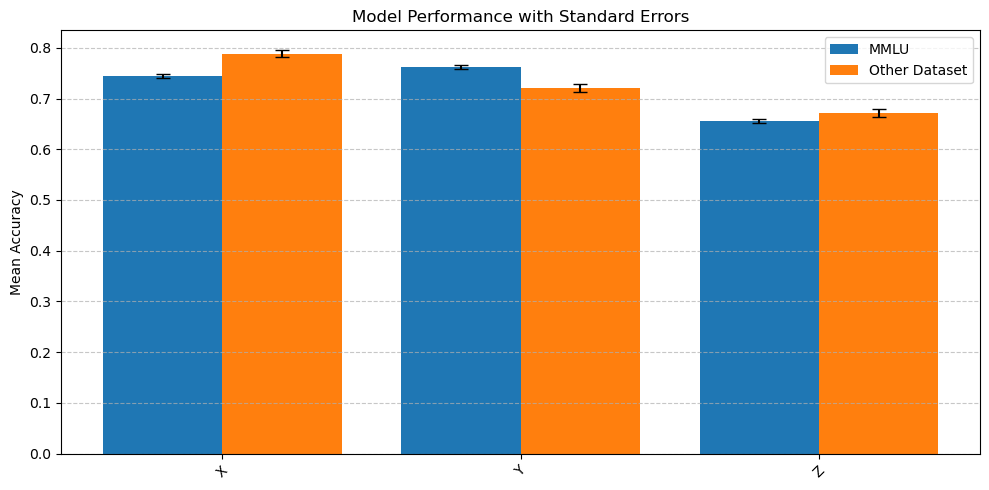

In [17]:
#B
fig, ax = plt.subplots(figsize=(10, 5))
bar_width = 0.4
x = np.arange(len(mean_mmlu))  # Using the number of models (index)

# Bar plot with error bars
ax.bar(x - bar_width/2, mean_mmlu, yerr=sem_mmlu, capsize=5, width=bar_width, label='MMLU')
ax.bar(x + bar_width/2, mean_other, yerr=sem_other, capsize=5, width=bar_width, label='Other Dataset')

# Formatting the plot
ax.set_xticks(x)
ax.set_xticklabels(mean_mmlu.index, rotation=45)  # Set model names as x-ticks
ax.set_ylabel("Mean Accuracy")
ax.set_title("Model Performance with Standard Errors")
ax.legend()

# Adding grid lines for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()

### 2.2 (5 pt)

Geronimo has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

In [7]:
#A 
distribution_mmlu = df_mmlu.groupby("correct")
distribution_other = df_other.groupby("correct")

In [9]:
#B

### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [10]:
#A

In [ ]:
#B

In [ ]:
#C

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [11]:
#A

B. /Discuss:/

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Geronimo. After thinking it over, Geronimo concludes that more tests are needed. He orders a second round of MMLU results. However, Geronimo thinks of the following twist: while keeping questions fixed, he randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Geronimo do this?

B. /Discuss:/

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

In [12]:
#fancy code

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [13]:
#A

B. /Discuss:/

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage based in Maastricht named Yodata:

```
"Hmmm, correct you are, jonge padawan, to question how the wereld is seen by large language models! Simple 'text,' it is not, nee nee nee! Characters and words, the way of gewone humans, this is not, heh heh heh.

'Tokens,' they use, ja! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z.' Chunky blocks of text, they become, yes! 'Hello world,' a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, hmm? Verwarrend, it is!

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.

Meditate on this, you should. The force of natural language processing, strong it is. But geduld, you must have, my jonge padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Ja, hmmm!"
```

Admittingly, Yodata at times speaks in riddles... However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [14]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    !pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

KeyboardInterrupt: 

### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

In [15]:
#A

In [ ]:
#B

In [ ]:
#C

### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each question-answer pair, compute: 
1. the number of "A", "B", "C", and "D" tokens that occur in the combined question and answers; 
2. an the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [17]:
#A

,A,B,C,D,total
,mean,mean,mean,mean,mean
answer,,,,,
A,0.243017,0.018932,0.025140,0.013035,93.187151
B,0.231947,0.019642,0.029463,0.012709,88.846332
C,0.226410,0.018984,0.034897,0.015355,92.653825
D,0.242850,0.014566,0.030985,0.014301,92.110169


B. /Discuss:/

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

In [16]:
#A

B. /Discuss:/

### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

B. /Discuss:/

1.

2.

3.

4.